**Shifted Sphere Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F1 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F1: Shifted Sphere<br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F1: spheredat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[0] = F1_min = -450
<img src="Functions.png">

Import Libraries

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from scipy.optimize import minimize
from psopy import minimize as minimize_pso

**Import Data**

In [4]:
# Import data in data.py file and print shape of input arrays
from data import *
print(spheredat.shape)
print(f_bias[0])

(1000,)
-450.0


- Algorithm : Particle Swarm Optimization. This algorithm is fast and suitable for high dimensions. The conjugate gradient descent algorithm works well on this continuous differentiable function.
- Library : psopy(PSO) & Scipy (CG)
- Parameters of the algorithm : Number of particles in the swarm
- Stopping criterion : stable_iter (the number of iterations with a stable result) = 100
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [10]:
# Define objective function to minimize
def Shifted_Sphere(x):
    return f_bias[0] + np.sum(np.power(x[:dim] - spheredat[:dim], 2))


def Minimize_CG(func, targetmin=None, tol=None, bounds_min = None, bounds_max = None):
    """Minimize func in dim dimensions using Conjugate Gradient algorithm
       Expected minimum is targetmin"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Initial guess
    x0 = np.random.uniform(bounds_min, bounds_max, dim)
    
    # Store convergence data
    convergdata = []
    def convergcurve(x):
        convergdata.append(func(x))
    
    # Run minimization algorithm
    res = minimize(func, x0, method='CG',
                   options={'gtol': tol, 'disp': True}, callback=convergcurve)
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))

    plt.plot(range(1,len(convergdata)+1),convergdata, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))

def Minimize_PSO(func, targetmin=None, nb_particles=None, stable_iter=None, self_confid=None, swarm_confid=None, 
                 bounds_min = None, bounds_max = None):
    """ Minimize func using Particle Swarm Optimization with a given particle self confidence and swarm condifence
        Stopping condition : Maximum change in best fitness smaller than default tol=1e-6 for stable_iter iterations"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Generate nb_particles particles of dimension dim, with coordinates between min and max
    x0 = np.random.uniform(bounds_min, bounds_max, (nb_particles, dim))
    
    # Run Particle Swarm Optimization
    res = minimize_pso(func, x0, options={'stable_iter': stable_iter, 'l_rate':self_confid, 'g_rate':swarm_confid, 
                       'verbose' : False, 'savefile': "output.csv"})
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(res.nit*nb_particles))

    converg = pd.read_csv("output.csv", sep=",")
    plt.plot(converg.Iter+1, converg.Func, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))

D = 50

Particle Swarm Optimization

Number of dimensions : 50
Computational time : 4.80 s
Fitness at minimum (result): -418.7681 
Fitness at minimum (real): -450.0000 
Function evaluations : 138750


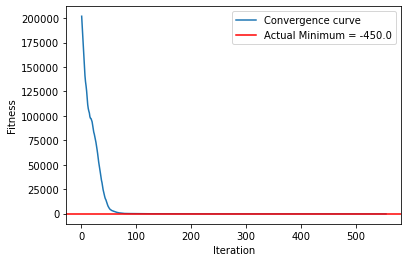

x_minimum :
[ 99.0321159   76.78770553 -20.18932769  24.42871781 -22.06983679
  69.58111807   4.99923609  61.28465176 -21.02785095  92.42793718
 -95.00596571  90.05311116  43.18223444  29.98334058 -11.09322657
 -66.97064493  67.357134    93.65114577 -73.41817062 -49.76405646
  81.81557936  35.22638081  24.91773797   1.24715958 -99.17857026
 -54.73985823  97.86471639  71.71151156 -98.02003437  -3.49098305
 -15.64422055  55.26884729  -1.05691753   3.17492127  57.52640389
  18.29809434 -75.5184196  -77.49151217  32.94953348  99.17386834
 -30.41850184 -65.05145644 -86.07330917 -38.05436043 -32.54233499
 -25.64307162  90.77586766  42.61402223  56.05305785  23.61192032]


In [9]:
dim = 50
Minimize_PSO(Shifted_Sphere, targetmin=f_bias[0], nb_particles=250, stable_iter=100, self_confid=2, swarm_confid=10,
            bounds_min = -100, bounds_max = 100)

Conjugate Gradient

Number of dimensions : 50
Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 520
         Gradient evaluations: 10
Computational time : 0.02 s
Fitness at minimum (result): -450.0000 
Fitness at minimum (real): -450.0000 


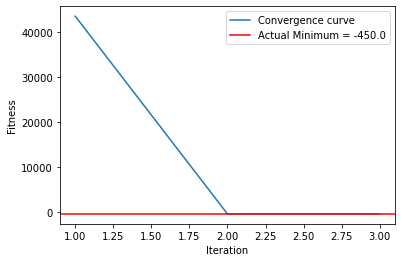

x_minimum :
[ 97.24993704  77.06098594 -19.03114875  25.42869858 -22.90880182
  69.57217698   5.36971522  61.48073095 -21.30069759  92.34681359
 -93.97587985  90.74598716  42.8769803   29.30964576 -10.66954857
 -65.07461754  67.04941672  94.01877097 -73.00502047 -49.8021983
  82.00142594  35.29318305  24.63214905   2.44313707 -99.30345097
 -54.62233834  95.69145831  72.25048129 -97.12295481  -2.84462651
 -16.71940708  54.58048508  -2.37049255   4.51291342  56.40988711
  18.24587056 -74.72144522 -78.05614562  32.58107778  99.4186224
 -30.76381127 -64.7890959  -86.42220717 -38.12082237 -33.0480407
 -24.766486    90.44136581  43.86410211  55.86848692  23.53173189]


In [11]:
dim = 50
Minimize_CG(Shifted_Sphere, targetmin=f_bias[0], tol=1e-05, bounds_min = -100, bounds_max = 100)

D = 500

Particle Swarm Optimization

Number of dimensions : 500
Computational time : 23.26 s
Fitness at minimum (result): 1098709.2651 
Fitness at minimum (real): -450.0000 
Function evaluations : 203500


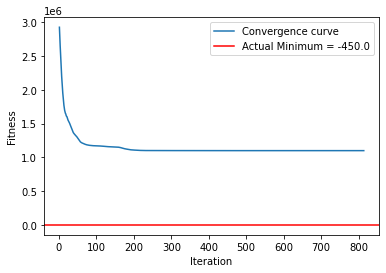

x_minimum :
[ 4.78098061e+01  5.44622769e+01 -1.73083330e+01  2.75116827e+01
  1.47564142e+00  2.97417450e+01  1.32808595e+01  3.61813453e+01
 -1.53917604e+01  3.93287585e+01 -8.12600193e+01  3.58077452e+01
  3.02313067e+01  7.17311885e+00  3.78413857e+01 -1.59920420e+01
  2.87209704e+01  7.32385881e+01  4.84241507e+00  2.95291354e+00
  4.19437490e+01  9.35594393e+00  3.27034479e+01 -4.17891146e+01
 -6.00787268e+01 -7.58482756e+01  4.60086194e+01  9.10219074e+01
 -4.53009574e+01 -1.48479595e+01 -1.39860715e+00  1.67198731e+01
  2.44152244e+00  2.70561955e+01  3.06659112e+01 -1.92406555e+01
 -3.24361432e+01 -4.21397475e+01  6.30989240e+01  2.23645340e+01
  2.60069614e+00 -2.86715782e+01 -4.11270416e+01 -1.98714603e+01
 -4.87599333e+01 -2.37977663e+01  6.30327532e+01  6.85638400e+01
  5.47260492e+01 -1.72906667e+00 -1.70069541e+01  3.46951598e+01
 -6.02686509e+01 -1.48166689e+01  5.28735913e+00 -4.28724806e+01
  2.13512490e+01 -3.59867366e+01  4.44826168e+01  1.73885015e+01
 -9.26521047e

In [17]:
dim = 500
Minimize_PSO(Shifted_Sphere, targetmin=f_bias[0], nb_particles=250, stable_iter=100, self_confid=0.5, swarm_confid=2,
            bounds_min = -100, bounds_max = 100)

Conjugate Gradient

Number of dimensions : 500
Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 5522
         Gradient evaluations: 11
Computational time : 0.19 s
Fitness at minimum (result): -450.0000 
Fitness at minimum (real): -450.0000 


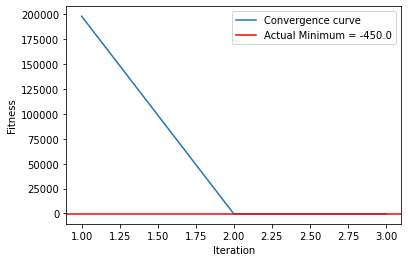

x_minimum :
[ 9.72499372e+01  7.70609849e+01 -1.90311496e+01  2.54286983e+01
 -2.29088023e+01  6.95721752e+01  5.36971407e+00  6.14807319e+01
 -2.13006984e+01  9.23468135e+01 -9.39758814e+01  9.07459868e+01
  4.28769798e+01  2.93096460e+01 -1.06695491e+01 -6.50746182e+01
  6.70494170e+01  9.40187701e+01 -7.30050205e+01 -4.98021989e+01
  8.20014246e+01  3.52931835e+01  2.46321503e+01  2.44313812e+00
 -9.93034517e+01 -5.46223384e+01  9.56914578e+01  7.22504811e+01
 -9.71229554e+01 -2.84462719e+00 -1.67194070e+01  5.45804835e+01
 -2.37049420e+00  4.51291457e+00  5.64098847e+01  1.82458698e+01
 -7.47214454e+01 -7.80561465e+01  3.25810772e+01  9.94186239e+01
 -3.07638114e+01 -6.47890961e+01 -8.64222070e+01 -3.81208220e+01
 -3.30480412e+01 -2.47664860e+01  9.04413674e+01  4.38641030e+01
  5.58684878e+01  2.35317323e+01  2.98476668e+01  5.12566606e+01
 -7.04331607e+01  1.98907349e+01  7.97217384e+01 -6.56134279e+01
  6.37856224e+01 -8.61412485e+01  9.11374528e+01 -3.65324324e+01
 -9.89597645e

In [16]:
dim = 500
Minimize_CG(Shifted_Sphere, targetmin=f_bias[0], tol=1e-05, bounds_min = -100, bounds_max = 100)

The PSO algorithm converges towards the global minimum but the Conjugate Gradient algorithm is more accurate and suitable for both D=50 and D=500.